# Лабораторная работа №2. Машинное обучение

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('./lab2.csv')

## 1. Предварительный анализ данных (EDA)

In [3]:
data

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [6]:
data['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [7]:
data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

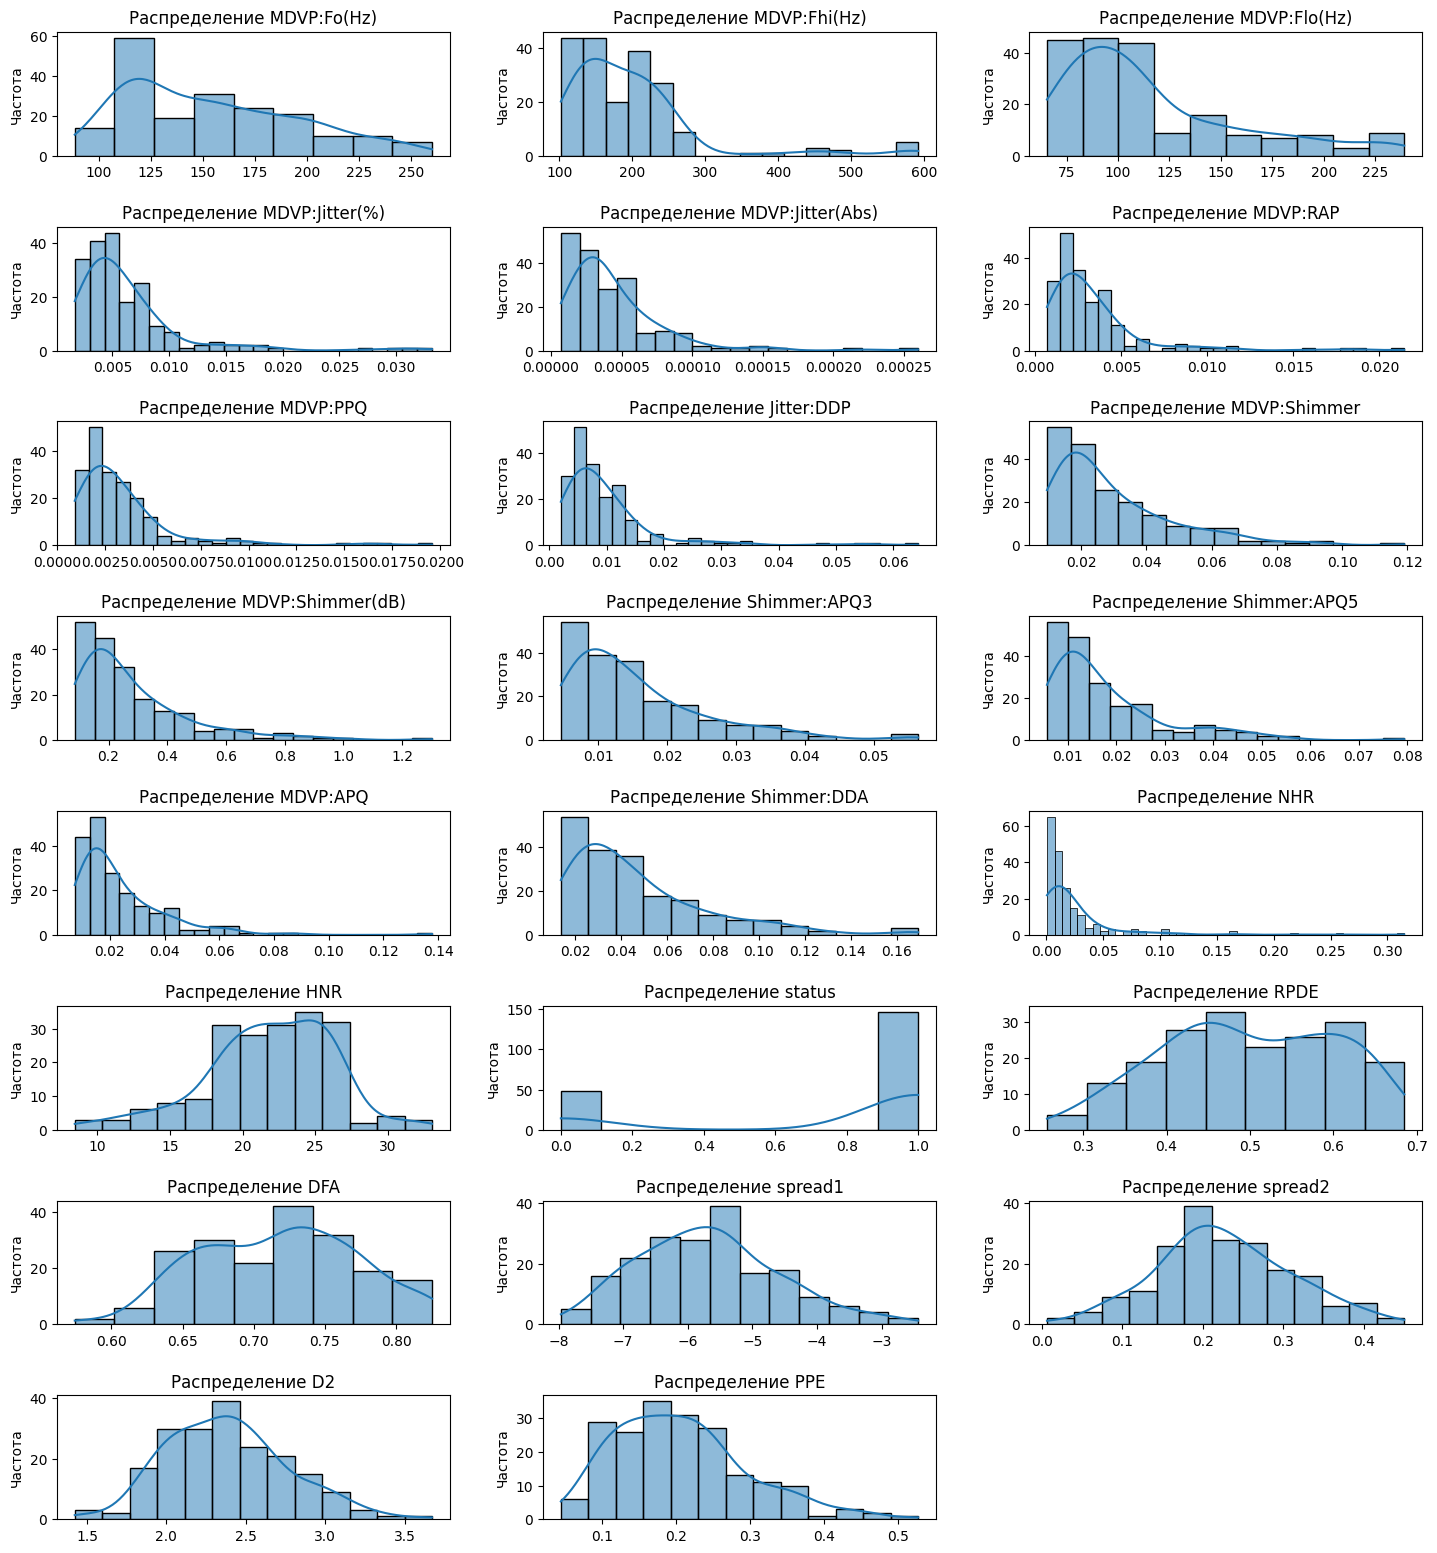

In [8]:
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
num_columns = 3
num_rows = (len(features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(features):
    row, col = divmod(i, num_columns)
    sns.histplot(data[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")

for i in range(len(features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

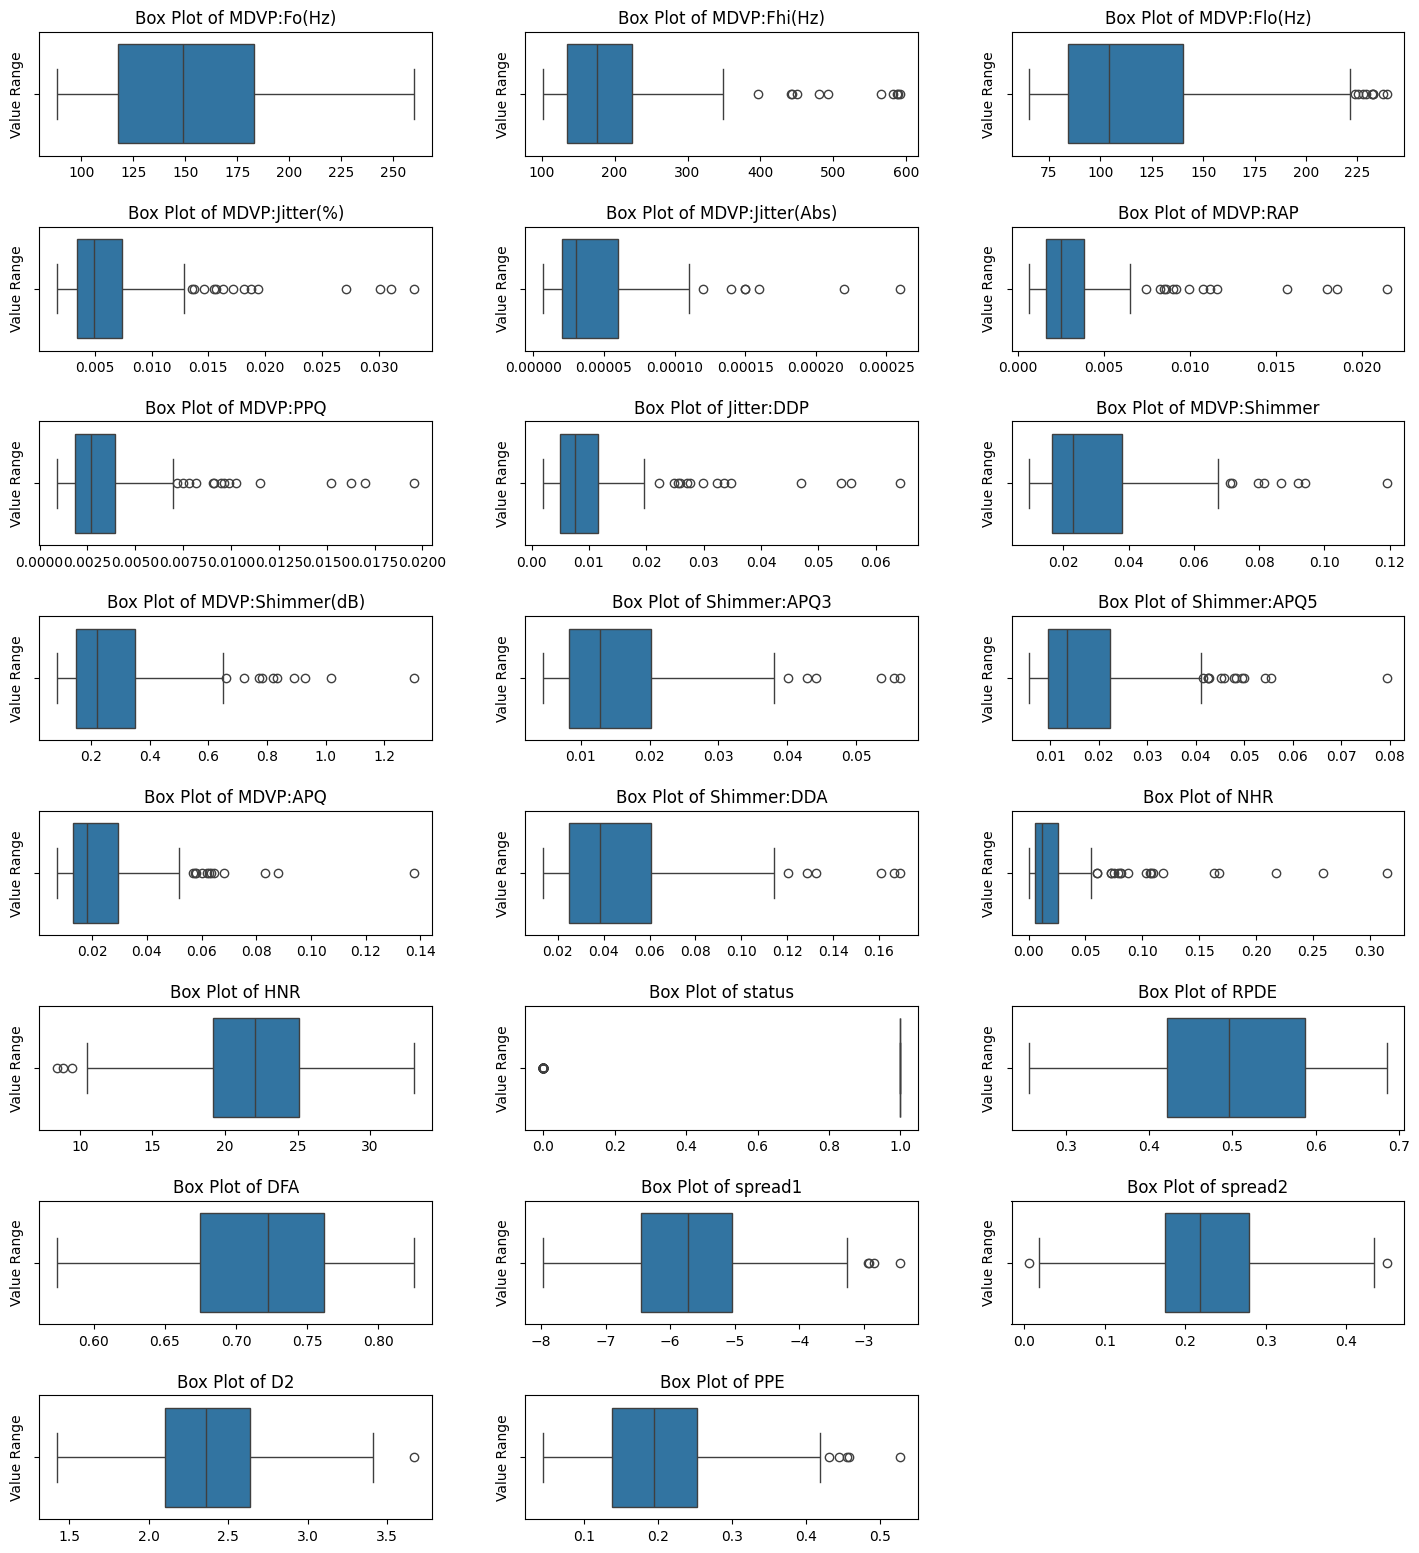

In [9]:
num_columns = 3
num_rows = (len(features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(features):
    row, col = divmod(i, num_columns)
    sns.boxplot(data=data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

for i in range(len(features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

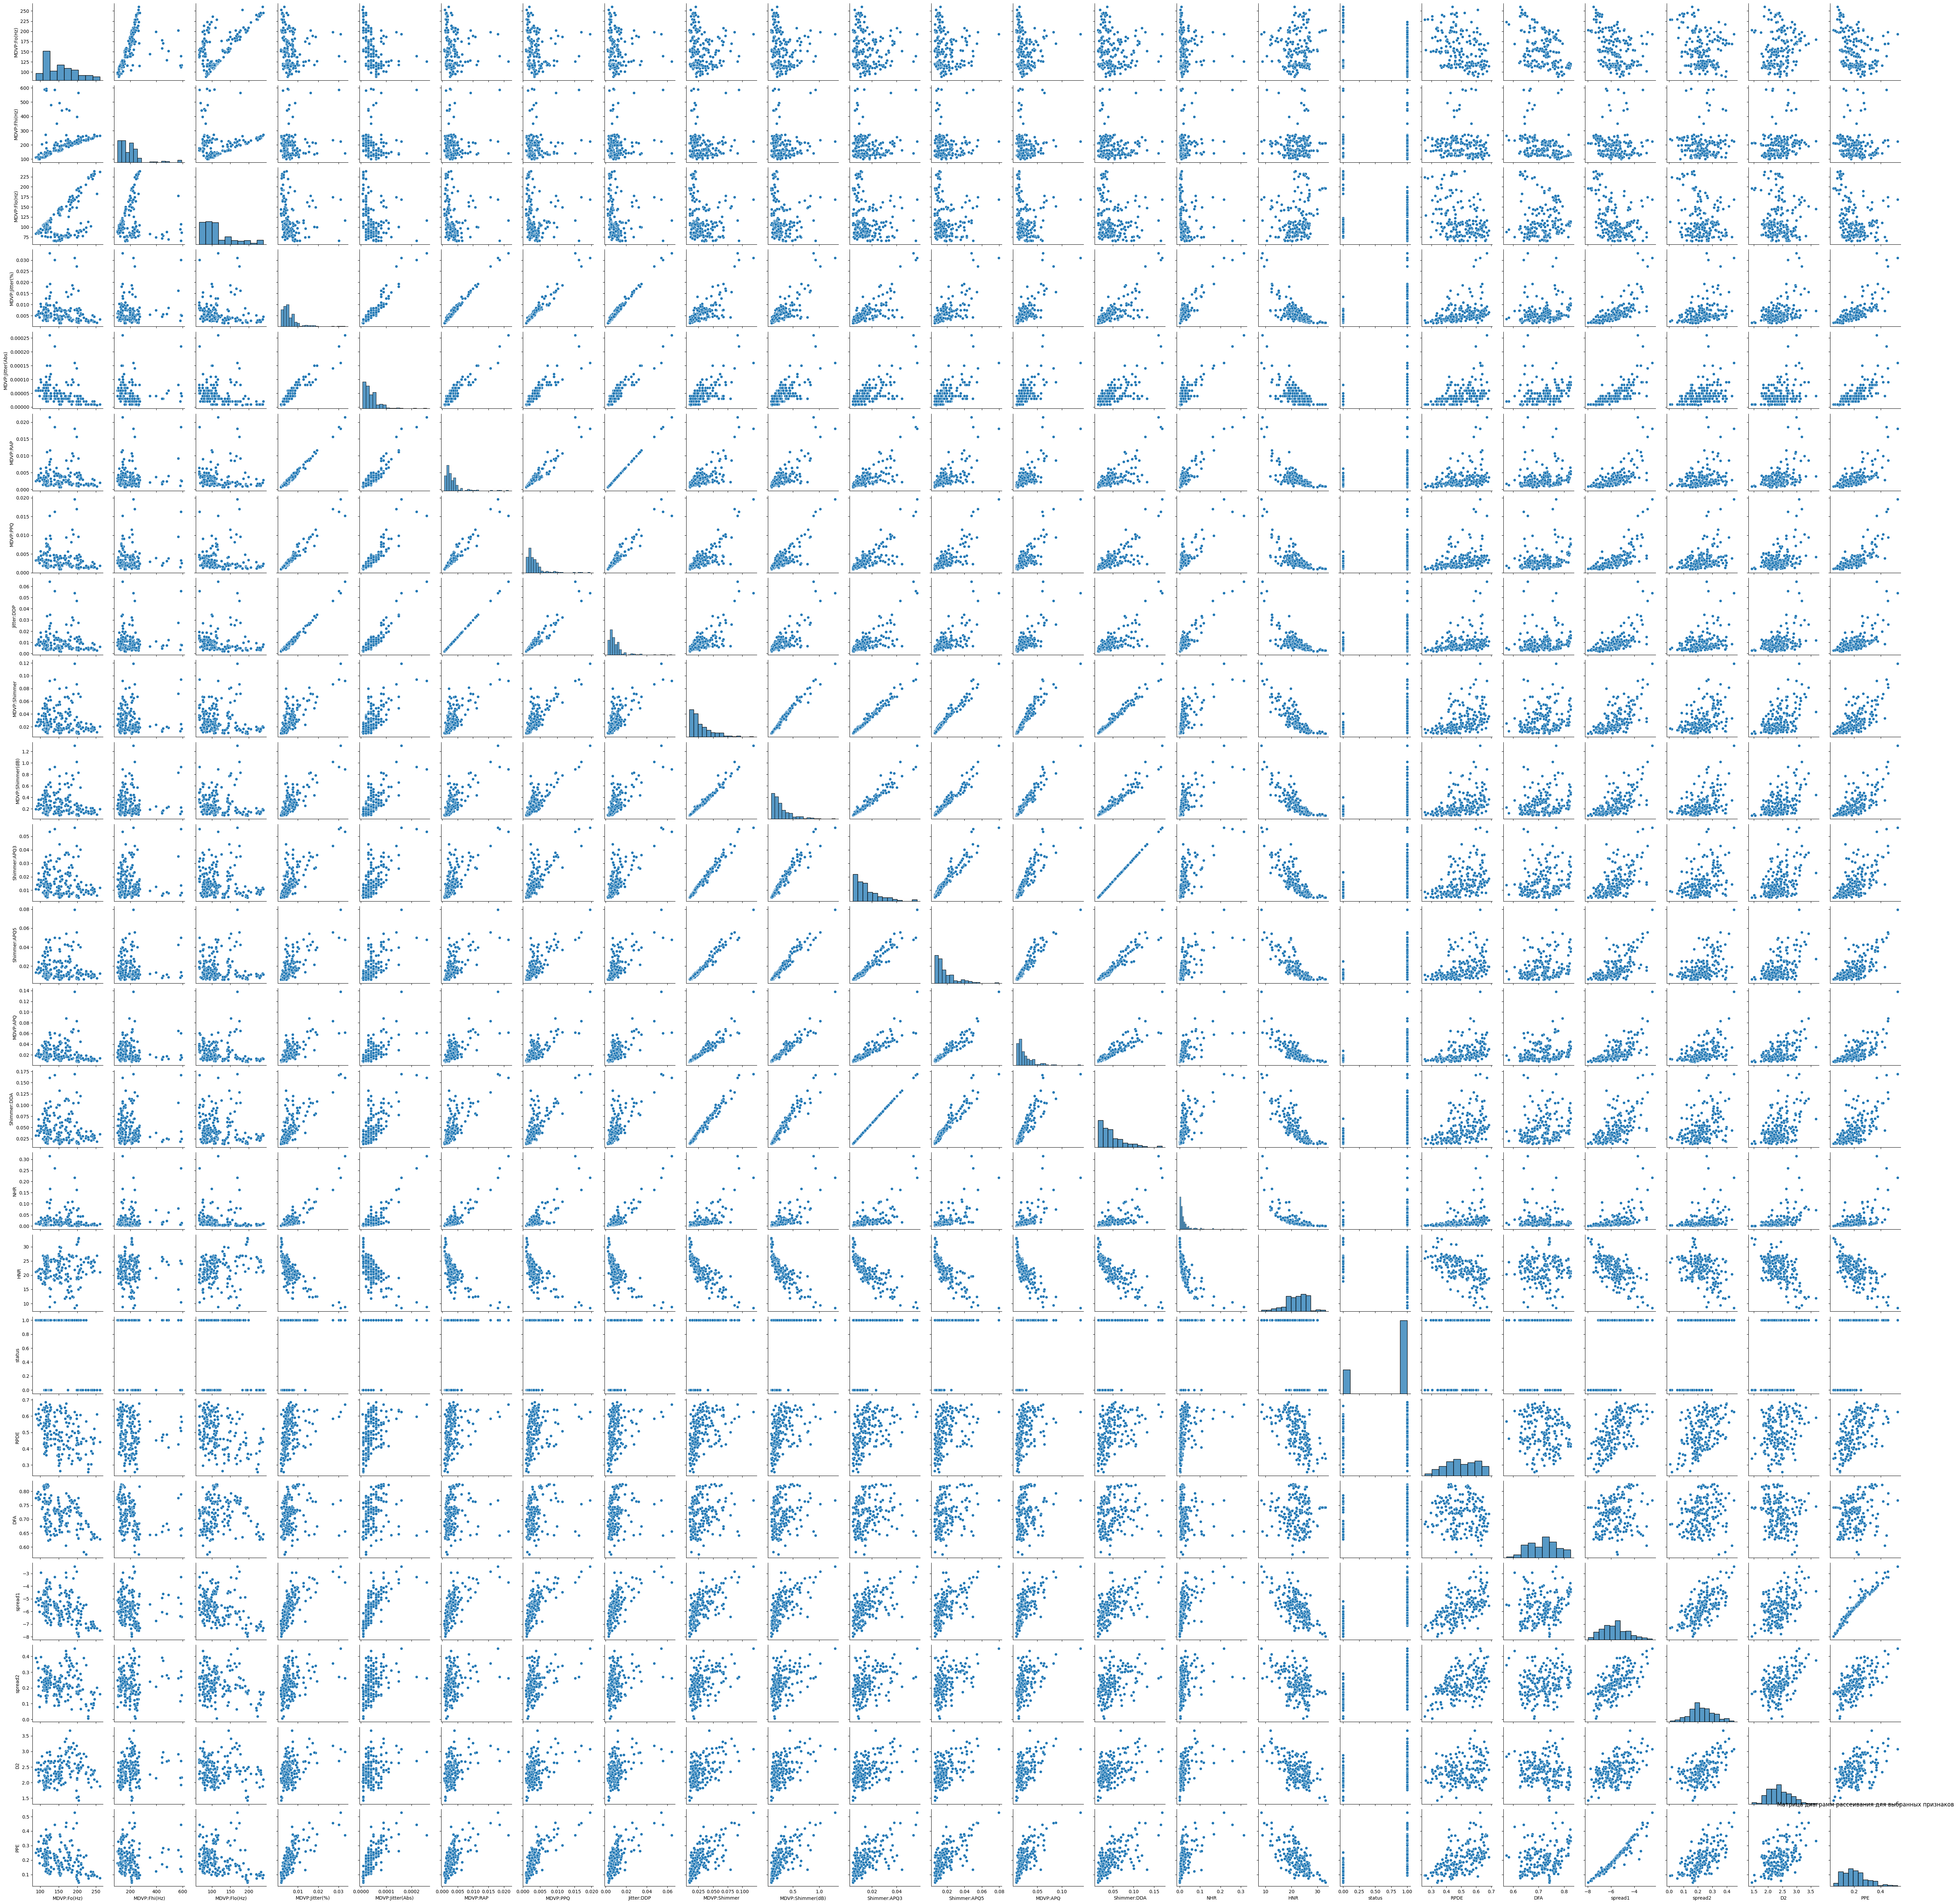

In [10]:
sns.pairplot(data[features])
plt.title('Матрица диаграмм рассеивания для выбранных признаков')
plt.show()

Можно сделать следующие выводы касательно особенностей данных:
1. 24 признака, один из которых (name) используется, вероятно, только для уникальной идентификации записей. 22 признака мы будем использовать для обучения модели, они все имеют вещественный тип данных. Признак **status** мы будем предсказывать, он имеет только два типа значений - 0 и 1, что объясняет нашу задачу бинарной классификации.
2. Классы несбалансированные, примеров наличия заболевания в датасете примерно в три раза больше, чем примеров его отсутствия.
3. При этом в датасете всего 195 сэмплов. Пропусков в данных нет, поэтому не придется что-либо удалять или заменять, а значит в работе моделей не будет погрешностей, связанных с этим. Нам это важно, так как при работе с медицинскими данными и различными диагнозами очень ценна точность предсказаний.
4. В некоторых признаках явно наблюдаются выбросы судя по диаграммам типа "ящик с усами". Но насколько мы можем в текущей ситуации, когда у нас медицинские данные, где каждая запись важна, и такое маленькое количество этих самых записей, удалять какие-либо строки - большой вопрос.
5. Между некоторыми признаками наблюдается сильная корреляция. Это может повлечь за собой риск переобучения модели. Данную гипотезу тоже нужно будет проверить.
6. Обязательно стоит выполнить скалирование данных перед обучением модели, так как разница диапазонов значений разных признаков довольно большая, что может негативно отразиться на работе моделей

In [11]:
data = data[features]

In [12]:
important_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

scaler = StandardScaler()
data[important_columns] = scaler.fit_transform(data[important_columns])

C:\Users\Таня\AppData\Local\Temp\ipykernel_10084\1302154287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[important_columns] = scaler.fit_transform(data[important_columns])


## 2. Пробное обучение моделей

Попробуем обучить модели без работы с выбросами и предполагаемой мультиколлинеарностью.
Тестируем три модели - логистическую регрессию, случайный лес и метод k-ближайших соседей. Посмотрим на метрику accuracy, матрицу ошибок и roc-кривую.

Accuracy: 0.90
Confusion Matrix:
[[ 3  4]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.89      1.00      0.94        32

    accuracy                           0.90        39
   macro avg       0.94      0.71      0.77        39
weighted avg       0.91      0.90      0.88        39



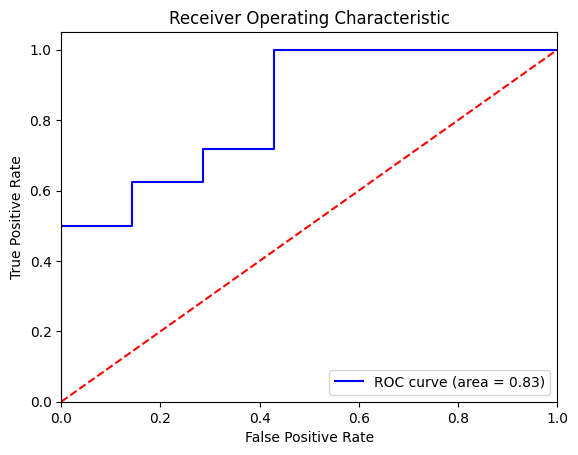

In [13]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.95
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



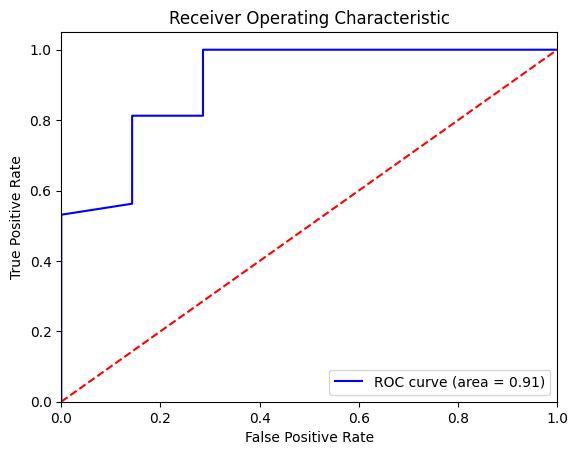

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.95
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



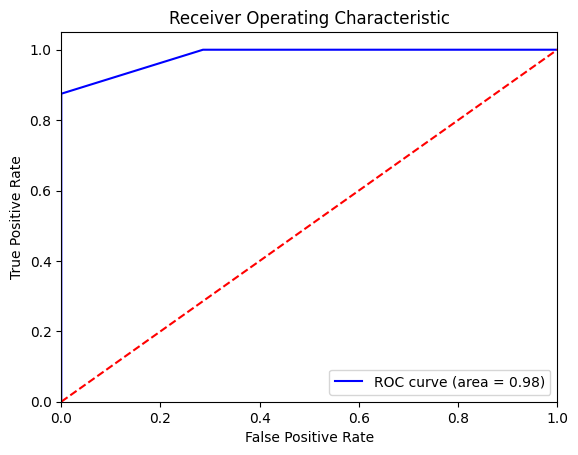

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Таким образом, все три модели показали довольно высокую точность предсказаний. Случайный лес и метод k-ближайших соседей демонстрируют accuracy, равную 0.95, что может указывать либо на хорошую работу моделей, либо на переобучение.

При этом все три модели отлично классифицируют положительные примеры и ошибаются только в отрицательных. То есть можно сказать о том, что у всех людей с заболеванием его наличие было определено. Однако наличие заболевания было предсказано моделью у нескольких здоровых людей, что в данном случае для нас не так критично, как если бы мы неверно причисляли болеющих людей к здоровым.

## 3. Предобработка данных

### Работа с выбросами

Попробуем обработать выбросы и поработать с коллинеарностью признаков

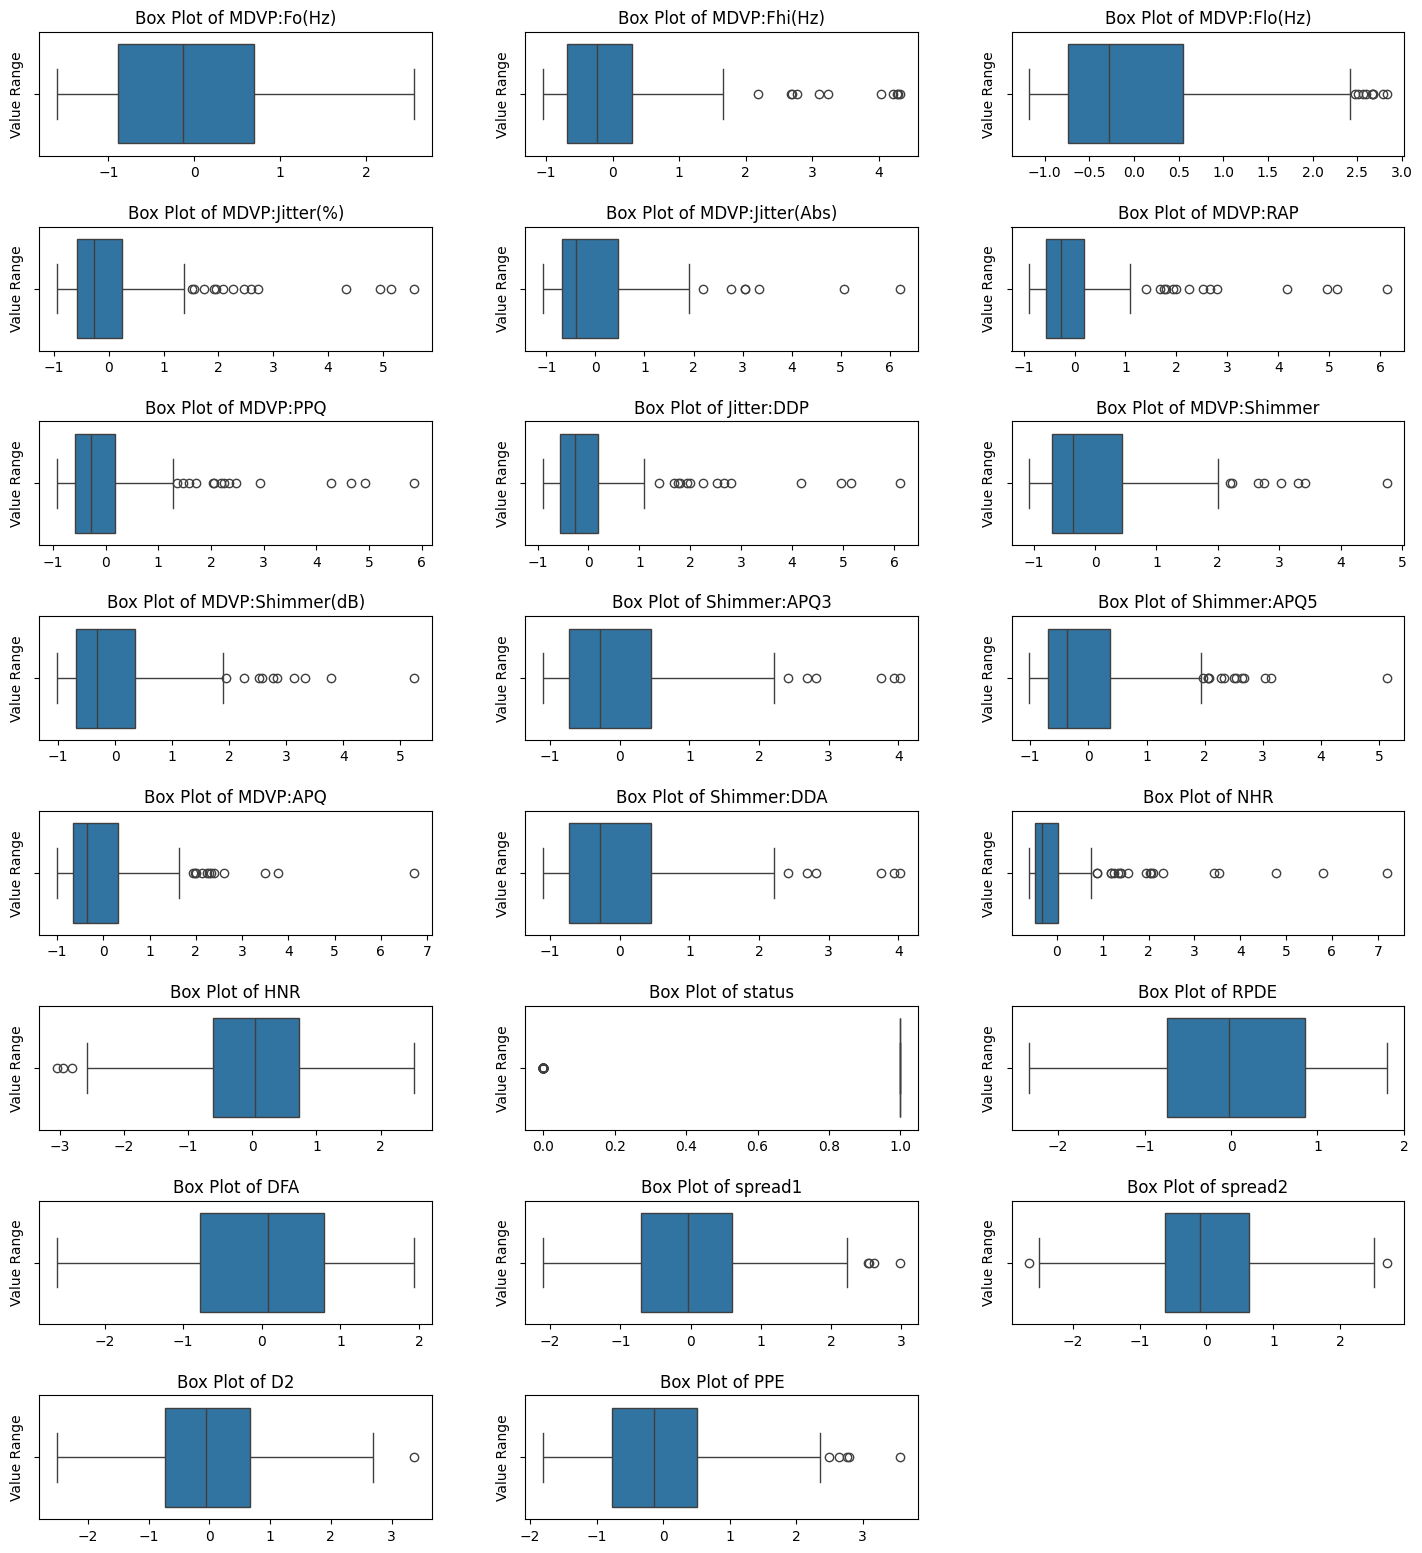

In [14]:
num_columns = 3
num_rows = (len(features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 16))
fig.tight_layout(pad=3.0)

for i, column in enumerate(features):
    row, col = divmod(i, num_columns)
    sns.boxplot(data=data, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

for i in range(len(features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

Удалим строки с выбросами только в тех признаках, где их много и они ярко выражены

In [ ]:
columns = ['MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'PPE']

for column in columns:
   Q1 = data[column].quantile(0.25)
   Q3 = data[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
   data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135 entries, 6 to 191
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              135 non-null    object 
 1   MDVP:Fo(Hz)       135 non-null    float64
 2   MDVP:Fhi(Hz)      135 non-null    float64
 3   MDVP:Flo(Hz)      135 non-null    float64
 4   MDVP:Jitter(%)    135 non-null    float64
 5   MDVP:Jitter(Abs)  135 non-null    float64
 6   MDVP:RAP          135 non-null    float64
 7   MDVP:PPQ          135 non-null    float64
 8   Jitter:DDP        135 non-null    float64
 9   MDVP:Shimmer      135 non-null    float64
 10  MDVP:Shimmer(dB)  135 non-null    float64
 11  Shimmer:APQ3      135 non-null    float64
 12  Shimmer:APQ5      135 non-null    float64
 13  MDVP:APQ          135 non-null    float64
 14  Shimmer:DDA       135 non-null    float64
 15  NHR               135 non-null    float64
 16  HNR               135 non-null    float64
 17  st

In [ ]:
data['status'].value_counts()

status
1    93
0    42
Name: count, dtype: int64

С одной стороны, посредством удаления выбросов удалось уменьшить несбалансированность классов. Но с другой стороны большиснство удаленных записей принадлежали к первому классу. Насколько мы можем считать выбросами наблюдения, полученные на практике - вопрос все еще открытый.

Теперь проверим, как удаление выбросов повлияет на точность предсказаний трех исходных моделей.

In [ ]:
important_columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

scaler = StandardScaler()
data[important_columns] = scaler.fit_transform(data[important_columns])

Accuracy: 0.89
Confusion Matrix:
[[ 6  1]
 [ 2 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.95      0.90      0.92        20

    accuracy                           0.89        27
   macro avg       0.85      0.88      0.86        27
weighted avg       0.90      0.89      0.89        27



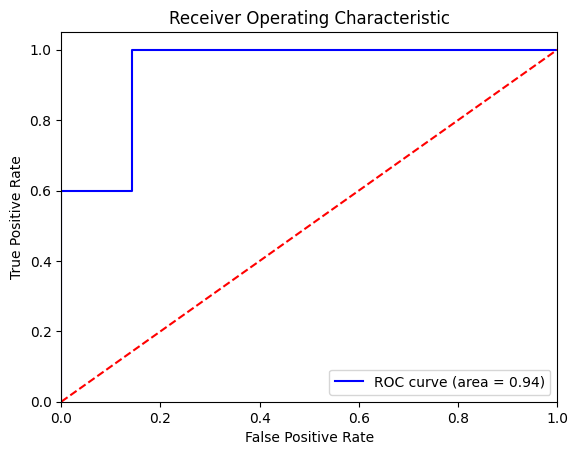

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.93
Confusion Matrix:
[[ 7  0]
 [ 2 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.90      0.95        20

    accuracy                           0.93        27
   macro avg       0.89      0.95      0.91        27
weighted avg       0.94      0.93      0.93        27



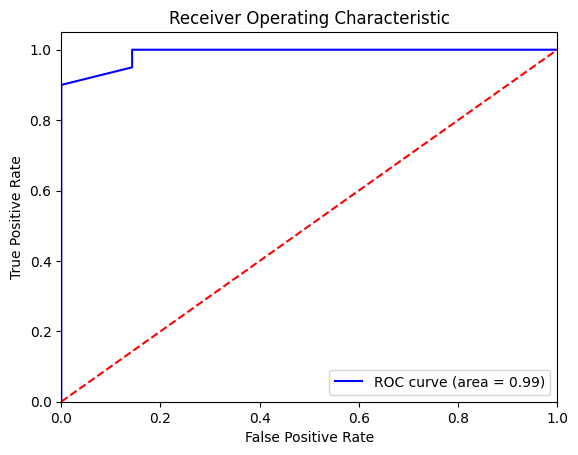

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.93
Confusion Matrix:
[[ 6  1]
 [ 1 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.95      0.95      0.95        20

    accuracy                           0.93        27
   macro avg       0.90      0.90      0.90        27
weighted avg       0.93      0.93      0.93        27



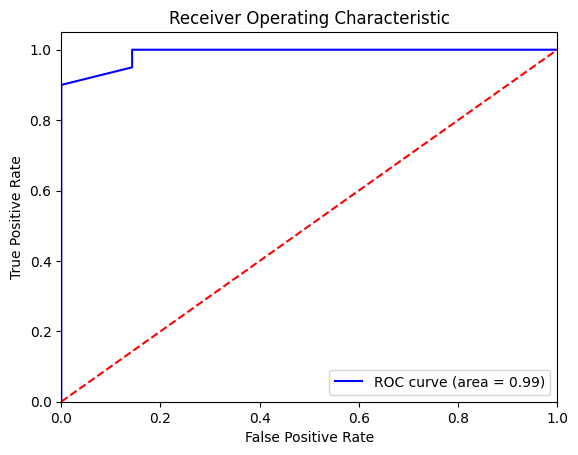

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Таким образом, удаление выбросов странным образом повлияло на модели и в результате точность ухудшилась.

Однако интересно обратить внимание на ошибки классификации. Модель логистической регрессии отнесла двух больных пациентов к здоровым и одного здорового наоборот к больным. Модель на основе алгоритма случайного леса классифицировала двух больных людей как здоровых. В то время как модель на основе метода k-ближайших соседей неверно классифицировала по одному больному и здоровому человеку.

На основании этого можно предварительно сделать вывод о том, что для решения данной задачи больше остальных подходит метод k-ближайших соседей, так как делает меньше ошибок при определении наличия заболевания у действительно больных людей.

### Работа с корреляцией признаков

Далее попробуем поработать с мультиколлинеарностью признаков и посмотрим, как это повлияет на точность предсказаний.

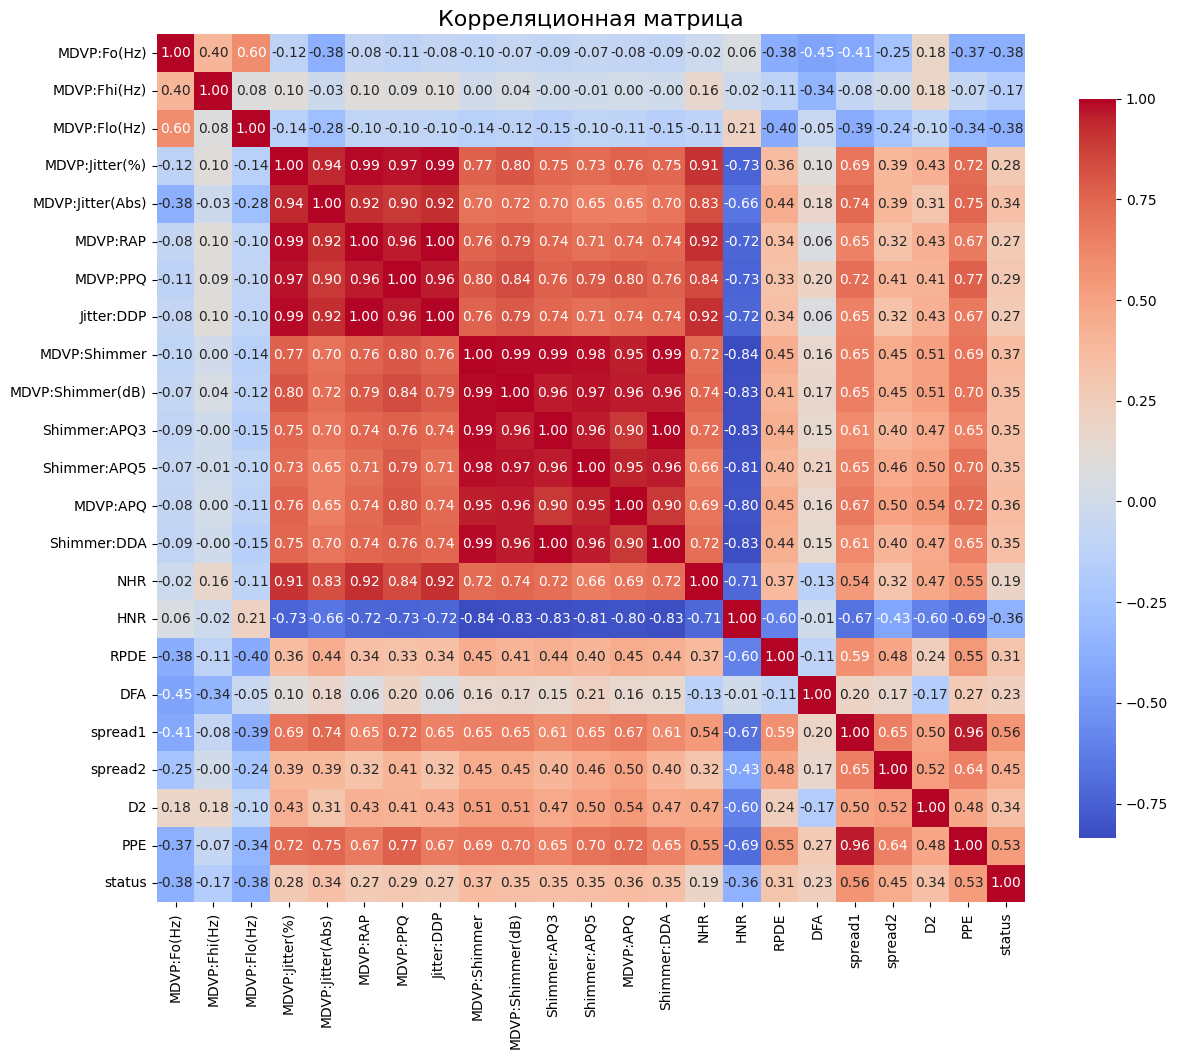

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']
plt.figure(figsize=(14, 12))
sns.heatmap(data[columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица', fontsize=16)
plt.show()

Корреляционная матрица так же подтверждает предположение о наличии взаимозависимости между признаками и даже группами признаков.

Попробуем оценить степень мультиколлинеарности методом VIF.

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']
vif = pd.DataFrame()
vif["feature"] = data[columns].columns
vif["VIF"] = [variance_inflation_factor(data[columns].values, i) for i in range(data[columns].shape[1])]

vif["VIF"] = vif["VIF"].apply(lambda x: f"{x:,.2f}")

print(vif)

             feature            VIF
0        MDVP:Fo(Hz)         103.12
1       MDVP:Fhi(Hz)           8.89
2       MDVP:Flo(Hz)          18.48
3     MDVP:Jitter(%)         524.54
4   MDVP:Jitter(Abs)         123.07
5           MDVP:RAP   3,103,319.50
6           MDVP:PPQ         274.44
7         Jitter:DDP   3,105,664.92
8       MDVP:Shimmer       2,664.57
9   MDVP:Shimmer(dB)         304.05
10      Shimmer:APQ3  51,153,833.64
11      Shimmer:APQ5         346.36
12          MDVP:APQ         184.37
13       Shimmer:DDA  51,127,073.62
14               NHR          16.12
15               HNR         132.11
16              RPDE          56.25
17               DFA         420.19
18           spread1         384.47
19           spread2          23.75
20                D2         113.93
21               PPE         137.02
22            status           7.84


Некоторые признаки имеют слишком большие значения VIF, попробуем их удалить и обучить модели на оставшихся.

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5',
       'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']
data = data[columns]

In [ ]:
data

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:PPQ  MDVP:Shimmer(dB)  Shimmer:APQ5  MDVP:APQ  \
0             0.00007   0.00554             0.426       0.03130   0.02971   
1             0.00008   0.00696             0.626       0.04518   0.04368   
2             0.00009   0.00781             0.482       0.03858   0.03590   
3             0.00009   0.00698             0.517       0.04005   0.03772   
4             0.00011   0.00908             0.584       0.04825   0.04465   
..                ...       ...               ...           ...       ...   
190           0.00003   0.00259             0.405       0.02498   0.02745   
191           0.00003   0.00292             0.263       0.01657   0.01879   
192           0.00008   0.00564             0.256       0.01365   0.01667   
193           0.00004   0.00390             0.241       0.01321   0.01588   
194           0.00003   0.00317             0.190       0.01161   0.01373   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0    0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1    0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2    0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3    0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4    0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   
..       ...     ...       ...       ...       ...       ...       ...   
190  0.02764  19.517  0.448439  0.657899 -6.538586  0.121952  2.657476   
191  0.01810  19.147  0.431674  0.683244 -6.195325  0.129303  2.784312   
192  0.10715  17.883  0.407567  0.655683 -6.787197  0.158453  2.679772   
193  0.07223  19.020  0.451221  0.643956 -6.744577  0.207454  2.138608   
194  0.04398  21.209  0.462803  0.664357 -5.724056  0.190667  2.555477   

          PPE  status  
0    0.284654       1  
1    0.368674       1  
2    0.332634       1  
3    0.368975       1  
4    0.410335       1  
..        ...     ...  
190  0.133050       0  
191  0.168895       0  
192  0.131728       0  
193  0.123306       0  
194  0.148569       0  

[195 rows x 18 columns]

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5',
       'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])

<ipython-input-65-8609d8f4f8ca>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns] = scaler.fit_transform(data[columns])


Accuracy: 0.92
Confusion Matrix:
[[ 4  3]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.91      1.00      0.96        32

    accuracy                           0.92        39
   macro avg       0.96      0.79      0.84        39
weighted avg       0.93      0.92      0.91        39



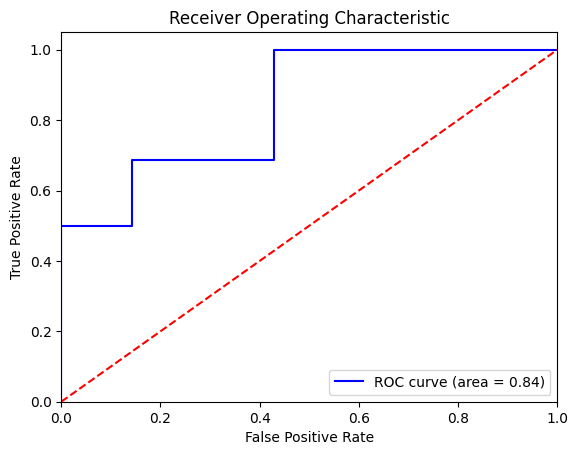

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5',
       'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.92
Confusion Matrix:
[[ 5  2]
 [ 1 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



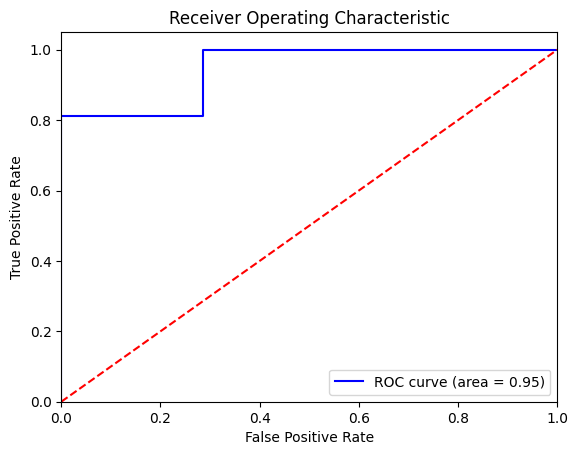

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5',
       'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.95
Confusion Matrix:
[[ 5  2]
 [ 0 32]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



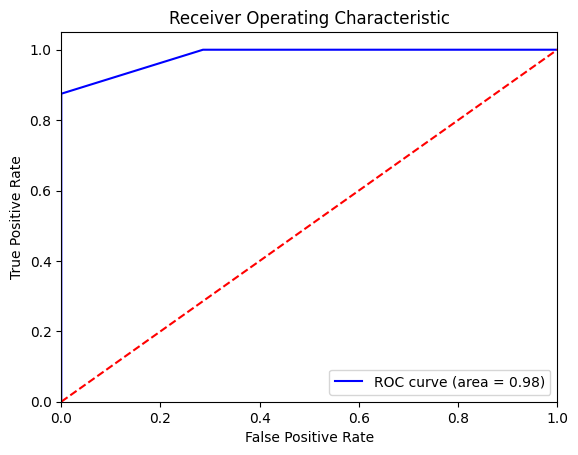

In [ ]:
columns = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:PPQ', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5',
       'MDVP:APQ', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']
target = 'status'

X = data[columns]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

У моделей логистической регрессии и случайного леса в результате удаления признаков наблюдается снидение точности предсказаний. Однако модель на основе метода k-ближайших соседей показывает такие же точные результаты, как и при обучении на полном наборе данных. А так как именно ее мы предварительно считаем лучшей из представленных моделей, можно сделать вывод, что удаление некоторых признаков позволяет снизить размерность, но при этом сохранить точность на то же уровне.

### Метод главных компонент

Также можно попробовать устранить мультиколлинеарность с помощью метода главных компонент. В качестве эксперимента попробуем выделить две компоненты и оценить, насколько каждый из исходных признаков на них влияет.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Labs_MO/lab2.csv')
data = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
            'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']]

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loadings_df = pd.DataFrame(loadings, index=data.columns, columns=[f"PC{i+1}" for i in range(loadings.shape[1])])

print(loadings_df)

for i in range(loadings_df.shape[1]):
    print(f"\nПризнаки, относящиеся к главной компоненте {i+1}:")
    print(loadings_df.iloc[:, i].sort_values(ascending=False).head(10))

                       PC1       PC2
MDVP:Fo(Hz)      -0.192472  0.874774
MDVP:Fhi(Hz)      0.024225  0.551327
MDVP:Flo(Hz)     -0.230325  0.625145
MDVP:Jitter(%)    0.918539  0.129286
MDVP:Jitter(Abs)  0.872226 -0.121356
MDVP:RAP          0.901614  0.183424
MDVP:PPQ          0.925816  0.107650
Jitter:DDP        0.901597  0.183436
MDVP:Shimmer      0.938341  0.083077
MDVP:Shimmer(dB)  0.944734  0.120561
Shimmer:APQ3      0.914426  0.093128
Shimmer:APQ5      0.910833  0.079170
MDVP:APQ          0.915382  0.075500
Shimmer:DDA       0.914431  0.093130
NHR               0.844174  0.269573
HNR              -0.873588 -0.058597
RPDE              0.529551 -0.392960
DFA               0.148017 -0.491261
spread1           0.807361 -0.378283
spread2           0.544026 -0.322812
D2                0.559105  0.209938
PPE               0.833902 -0.338197

Признаки, относящиеся к главной компоненте 1:
MDVP:Shimmer(dB)    0.944734
MDVP:Shimmer        0.938341
MDVP:PPQ            0.925816
MDVP:Jitter(%) 

Таким образом, прослеживается почти четкое разделение признаков на две группы (которые выделялись в корреляционной матрице). При этом влияние признаков на каждую из компонент очень велико, что позволяет сохранить достаточно большой объем исходной информации.

Далее проведем эксперименты с нашими моделями и попробуем подобрать оптимальное количество компонент для каждой из них, а также оценим точность.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Labs_MO/lab2.csv')
data = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
             'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']]

In [ ]:
X = data.drop(columns=['status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = LogisticRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 4  3]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weighted avg       0.89      0.90      0.89        39



In [ ]:
data = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
             'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']]

In [ ]:
X = data.drop(columns=['status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5  2]
 [ 1 31]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.95        32

    accuracy                           0.92        39
   macro avg       0.89      0.84      0.86        39
weighted avg       0.92      0.92      0.92        39



In [ ]:
X = data.drop(columns=['status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5  2]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



Таким образом, для модели логистической регрессии оптимальное число компонент - 4, для случайного леса - 10, а для k-ближайших соседей - 9. Если брать меньше компонент, точность снижается, а если больше - остается на том же уровне. То есть именно при таких значениях удается достичь баланса между точностью предсказаний и оптимизацией производительности.

## 4. Результаты

На заключительном этапе объединим работу с выбросами и метод главных компонент, взяв модель, основанную на методе k-ближайших соседей.

In [ ]:
data = pd.read_csv('./lab2.csv')
data = data[['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
             'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE', 'status']]

In [ ]:
columns = ['MDVP:Fhi(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer',
            'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'PPE']

for column in columns:
   Q1 = data[column].quantile(0.25)
   Q3 = data[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
   data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

In [ ]:
data['status'].value_counts()

status
1    93
0    42
Name: count, dtype: int64

Accuracy: 0.96
Confusion Matrix:
[[ 6  1]
 [ 0 20]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.95      1.00      0.98        20

    accuracy                           0.96        27
   macro avg       0.98      0.93      0.95        27
weighted avg       0.96      0.96      0.96        27



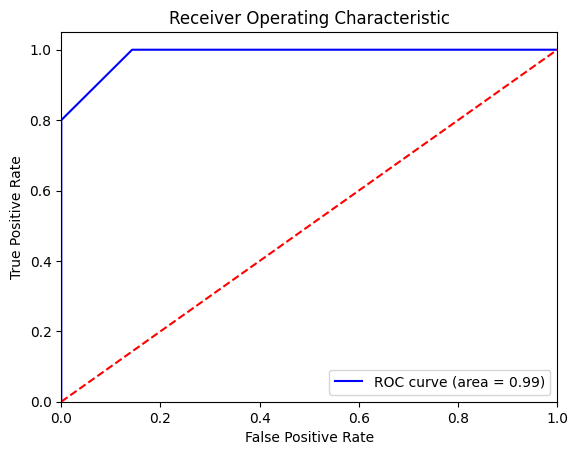

In [ ]:
X = data.drop(columns=['status'])
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Таким образом, посредством объединения методов получилось довести значение метрики accuracy до 0.96. И всего один здоровый человек был отнесен моделью к заболевшим.

В дальнейшем можно будет попробовать потестировать эту модель на удаленных записях с выбросами и посмотреть что будет.